In [1]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
# Importação das dependencias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
filename = 'table_values_csv.csv'
df = pd.read_csv(filename, sep=',',low_memory=False)
display(df.head())
df.info()

,id_x,due_date,new_due_date,created_at,updated_at,number,value,nfe_number,nfe_series,kind_x,...,document_number,authorized_third_party_id,company_name,kind_y,paymaster_id,ballast_kind,invoice_number,payment_place,update_reason_kind,finished_at
0,b13369ca-e3de-451c-bfa0-2c2c06db00da,2023-08-05,2023-08-05,2023-07-12 13:38:12.047933,2023-07-12 13:38:12.061655,003123,0.01,523451,6,services,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,invoice,123123,São Paulo,others,NaN
1,c2f7a256-7165-4787-966e-e094344827d8,2024-03-23,2024-03-23,2024-02-07 19:34:32.485735,2024-02-07 19:34:32.485735,2,2014.09,000005010,001,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,BA,others,NaN
2,1bedeb72-2413-43ec-95a9-c6b539ce6a99,2024-01-17,2024-01-17,2023-12-20 13:22:01.374323,2023-12-20 13:22:01.374323,1,1047.74,000038412,001,goods,...,9.153087e+13,NaN,Gabeira-Mangueira,registration_participant,NaN,nfe_key,NaN,RN,NaN,NaN
3,ac2d5831-fdd6-44c5-8b07-01faa04dc451,2023-07-31,2023-07-31,2023-06-29 17:54:29.988490,2023-06-29 17:54:29.988490,3932,59.83,3932,1,goods,...,9.409448e+13,NaN,Cardoso LTDA,registration_participant,NaN,nfe_key,NaN,teste,operational_error,NaN
4,dacc7c5a-accb-430b-8d51-5aceb572e2c4,2033-08-05,2033-08-05,2024-02-07 18:56:32.251144,2024-02-07 18:56:32.256128,910304872,0.01,910304872,910304872,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,São Paulo,others,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181239 entries, 0 to 181238
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_x                       181239 non-null  object 
 1   due_date                   181239 non-null  object 
 2   new_due_date               181239 non-null  object 
 3   created_at                 181239 non-null  object 
 4   updated_at                 181239 non-null  object 
 5   number                     181239 non-null  object 
 6   value                      181239 non-null  float64
 7   nfe_number                 180511 non-null  object 
 8   nfe_series                 180405 non-null  object 
 9   kind_x                     181239 non-null  object 
 10  state_x                    181239 non-null  object 
 11  payer_id                   181239 non-null  object 
 12  name_x                     181239 non-null  object 
 13  document_number_x          18

In [12]:
anomalia_payer = df[['document_number_x','value']]

#TRansformar o conutry em id
anomalia_payer['payer_id'] = pd.factorize(anomalia_payer['document_number_x'])[0]

contagem_id = anomalia_payer['payer_id'].value_counts()
duplicados = contagem_id[contagem_id > 1]

anomalia_payer = anomalia_payer.sort_values(by='payer_id')
display(anomalia_payer[anomalia_payer['payer_id'] == 0])

C:\Users\julio.martins\AppData\Local\Temp\ipykernel_29844\2308497804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalia_payer['payer_id'] = pd.factorize(anomalia_payer['document_number_x'])[0]


,document_number_x,value,payer_id
0,2814097000100,0.01,0
39,2814097000100,0.01,0
37,2814097000100,0.01,0
36,2814097000100,0.01,0
40,2814097000100,0.01,0
47,2814097000100,1000.00,0
46,2814097000100,0.01,0
44,2814097000100,0.01,0
67,2814097000100,1000.00,0
62,2814097000100,1000.00,0


In [13]:
# Calcule a média dos valores para cada `payer_id`
media_por_payer = anomalia_payer.groupby('payer_id')['value'].mean().reset_index()

# Renomeie a coluna para identificar que é a média
media_por_payer = media_por_payer.rename(columns={'value': 'media_valor'})

# Mescle essa média de volta ao DataFrame original
anomalia_payer = anomalia_payer.merge(media_por_payer, on='payer_id', how='left')

display(anomalia_payer)

,document_number_x,value,payer_id,media_valor
0,2814097000100,0.01,0,217.20
1,2814097000100,0.01,0,217.20
2,2814097000100,0.01,0,217.20
3,2814097000100,0.01,0,217.20
4,2814097000100,0.01,0,217.20
...,...,...,...,...
181234,6057223031484,4769.81,9934,4769.81
181235,18890006000147,25116.00,9935,25116.00
181236,6057223040637,3916.41,9936,3916.41
181237,6057223038144,3123.98,9937,3123.98


In [15]:
# Defina a coluna 'fraude' com base na condição
anomalia_payer['fraude'] = anomalia_payer.apply(lambda x: 1 if (x['value'] - x['media_valor']) > (x['media_valor'] * 3) else 0, axis=1)
display(anomalia_payer)

display(anomalia_payer[anomalia_payer['fraude'] == 1])

,document_number_x,value,payer_id,media_valor,fraude
0,2814097000100,0.01,0,217.20,0
1,2814097000100,0.01,0,217.20,0
2,2814097000100,0.01,0,217.20,0
3,2814097000100,0.01,0,217.20,0
4,2814097000100,0.01,0,217.20,0
...,...,...,...,...,...
181234,6057223031484,4769.81,9934,4769.81,0
181235,18890006000147,25116.00,9935,25116.00,0
181236,6057223040637,3916.41,9936,3916.41,0
181237,6057223038144,3123.98,9937,3123.98,0


,document_number_x,value,payer_id,media_valor,fraude
5,2814097000100,1000.00,0,217.200000,1
8,2814097000100,1000.00,0,217.200000,1
9,2814097000100,1000.00,0,217.200000,1
12,2814097000100,1000.00,0,217.200000,1
28,2814097000100,1000.00,0,217.200000,1
31,2814097000100,1000.00,0,217.200000,1
33,2814097000100,1000.00,0,217.200000,1
36,2814097000100,1000.00,0,217.200000,1
37,2814097000100,1000.00,0,217.200000,1
60,11374436771,59.83,3,6.164444,1


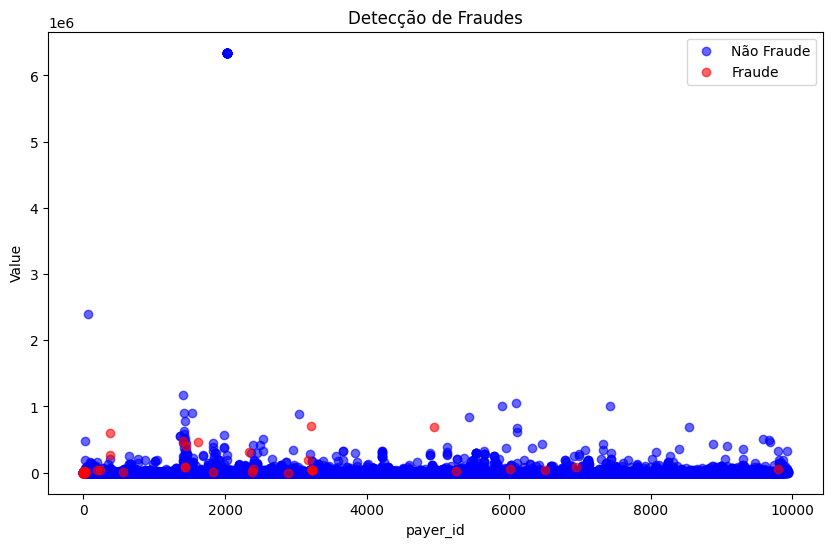

In [17]:
#Plotar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as transações não fraudulentas
plt.scatter(anomalia_payer[anomalia_payer['fraude'] == 0]['payer_id'], anomalia_payer[anomalia_payer['fraude'] == 0]['value'], 
            color='blue', label='Não Fraude', alpha=0.6)

# Plotar as transações fraudulentas
plt.scatter(anomalia_payer[anomalia_payer['fraude'] == 1]['payer_id'], anomalia_payer[anomalia_payer['fraude'] == 1]['value'], 
            color='red', label='Fraude', alpha=0.6)

# Configurações do gráfico
plt.xlabel('payer_id')
plt.ylabel('Value')
plt.title('Detecção de Fraudes')
plt.legend()
plt.show()

In [21]:
X = anomalia_payer[['payer_id', 'value', 'media_valor']]
y = anomalia_payer['fraude']

# Divida os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instancie e treine o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Preveja e avalie o modelo
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54354
           1       1.00      0.61      0.76        18

    accuracy                           1.00     54372
   macro avg       1.00      0.81      0.88     54372
weighted avg       1.00      1.00      1.00     54372

Confusion Matrix:
 [[54354     0]
 [    7    11]]
Accuracy Score: 0.9998712572647687


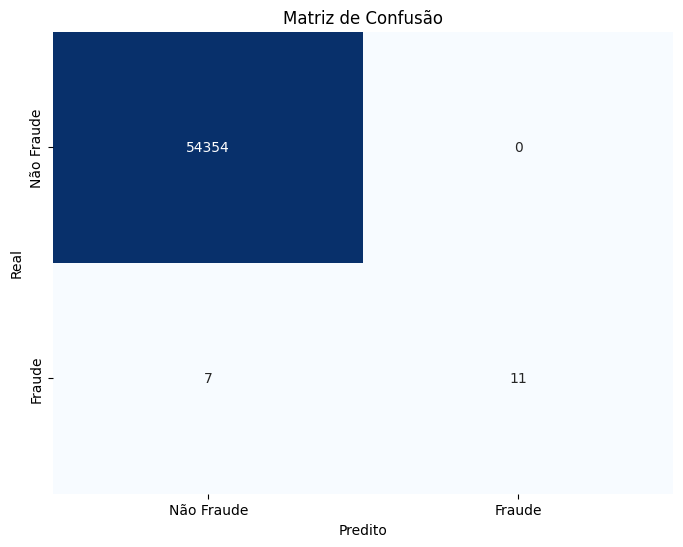

In [22]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()